In [5]:
# https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
# C = 1/lamda 
# l1 : Lasso regularization
# l2 : Ridge regularization
# https://wikidocs.net/16594 

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import GridSearchCV  

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt


In [7]:
data = pd.read_csv("bladder_cancer.csv")
data.head(3)

,Amp_1MHz,Phase_1MHz,Amp_500kHz,Phase_500kHz,Amp_100kHz,Phase_100kHz,Amp_50kHz,Phase_50kHz,Amp_10kHz,Phase_10kHz,Label
0,1826.379159,-83.458529,3578.605538,-85.824932,17848.77353,-85.555033,30923.77481,-84.679487,121151.8394,-79.349716,1
1,1822.430390,-83.707765,3588.429488,-85.421176,17537.29920,-87.164969,31855.09213,-88.802440,121616.4272,-78.980499,1
2,1824.105505,-83.823186,3532.988697,-85.372390,16429.97769,-87.916345,31066.25861,-83.519898,121313.6036,-79.646773,1


In [8]:
# pd.set_option('display.max_rows',None) # pandas 의 row 값을 모두 보고 싶을 때 설정하는 option
data.isnull().sum()

Amp_1MHz         2
Phase_1MHz       2
Amp_500kHz       3
Phase_500kHz     3
Amp_100kHz       3
Phase_100kHz     3
Amp_50kHz       14
Phase_50kHz     14
Amp_10kHz       12
Phase_10kHz     12
Label            0
dtype: int64

In [9]:
data = data.dropna()

In [10]:
data.isnull().sum()

Amp_1MHz        0
Phase_1MHz      0
Amp_500kHz      0
Phase_500kHz    0
Amp_100kHz      0
Phase_100kHz    0
Amp_50kHz       0
Phase_50kHz     0
Amp_10kHz       0
Phase_10kHz     0
Label           0
dtype: int64

In [11]:
# data

In [12]:

X = data.drop(columns=['Label'], axis=1)
y = data['Label']

In [13]:
# train_set with cross-validation : test_set = 80 : 20 

train_feature, test_feature, train_label, test_label = train_test_split(X, y, test_size = 0.2,random_state=0)

In [14]:
print(train_feature.shape)
print(test_feature.shape)
print(train_label.shape)
print(test_label.shape)

(188, 10)
(48, 10)
(188,)
(48,)


In [15]:
# feature normalization, label 은 normalization 진행하지 않았음
scaler = StandardScaler() # scaler 객체 생성
scaler.fit(train_feature) # train_feature 의 mean 과 standard deviation 값을 추출
train_feature_scaled = scaler.transform(train_feature) # train_feature 의 정규화 진행
test_feature_scaled = scaler.transform(test_feature) # test_feature 의 정규화 진행.
# test_feature 는 mean 과 standard deviation 값을 추출하는 과정 하면 안됨. 
# 학습할 때와 동일한 기반 설정으로 동일하게 테스트 데이터를 변환되야 함. 

In [16]:
# np.arange(start,stop,step)
C_range = 10. ** np.arange(-4,1,0.01) # 3-(-3)/10
print(C_range)
regrularization = ['l1', 'l2']
#print(regrularization)

[1.00000000e-04 1.02329299e-04 1.04712855e-04 1.07151931e-04
 1.09647820e-04 1.12201845e-04 1.14815362e-04 1.17489755e-04
 1.20226443e-04 1.23026877e-04 1.25892541e-04 1.28824955e-04
 1.31825674e-04 1.34896288e-04 1.38038426e-04 1.41253754e-04
 1.44543977e-04 1.47910839e-04 1.51356125e-04 1.54881662e-04
 1.58489319e-04 1.62181010e-04 1.65958691e-04 1.69824365e-04
 1.73780083e-04 1.77827941e-04 1.81970086e-04 1.86208714e-04
 1.90546072e-04 1.94984460e-04 1.99526231e-04 2.04173794e-04
 2.08929613e-04 2.13796209e-04 2.18776162e-04 2.23872114e-04
 2.29086765e-04 2.34422882e-04 2.39883292e-04 2.45470892e-04
 2.51188643e-04 2.57039578e-04 2.63026799e-04 2.69153480e-04
 2.75422870e-04 2.81838293e-04 2.88403150e-04 2.95120923e-04
 3.01995172e-04 3.09029543e-04 3.16227766e-04 3.23593657e-04
 3.31131121e-04 3.38844156e-04 3.46736850e-04 3.54813389e-04
 3.63078055e-04 3.71535229e-04 3.80189396e-04 3.89045145e-04
 3.98107171e-04 4.07380278e-04 4.16869383e-04 4.26579519e-04
 4.36515832e-04 4.466835

In [17]:
param_grid = dict(C=C_range)
# param_grid


{'C': array([1.00000000e-04, 1.02329299e-04, 1.04712855e-04, 1.07151931e-04,
        1.09647820e-04, 1.12201845e-04, 1.14815362e-04, 1.17489755e-04,
        1.20226443e-04, 1.23026877e-04, 1.25892541e-04, 1.28824955e-04,
        1.31825674e-04, 1.34896288e-04, 1.38038426e-04, 1.41253754e-04,
        1.44543977e-04, 1.47910839e-04, 1.51356125e-04, 1.54881662e-04,
        1.58489319e-04, 1.62181010e-04, 1.65958691e-04, 1.69824365e-04,
        1.73780083e-04, 1.77827941e-04, 1.81970086e-04, 1.86208714e-04,
        1.90546072e-04, 1.94984460e-04, 1.99526231e-04, 2.04173794e-04,
        2.08929613e-04, 2.13796209e-04, 2.18776162e-04, 2.23872114e-04,
        2.29086765e-04, 2.34422882e-04, 2.39883292e-04, 2.45470892e-04,
        2.51188643e-04, 2.57039578e-04, 2.63026799e-04, 2.69153480e-04,
        2.75422870e-04, 2.81838293e-04, 2.88403150e-04, 2.95120923e-04,
        3.01995172e-04, 3.09029543e-04, 3.16227766e-04, 3.23593657e-04,
        3.31131121e-04, 3.38844156e-04, 3.46736850e-04, 3.5

In [18]:
# grid search 
grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv = StratifiedKFold(5)) # k = 5

# 학습 실행
grid.fit(train_feature_scaled, train_label)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.02329299e-04, 1.04712855e-04, 1.07151931e-04,
       1.09647820e-04, 1.12201845e-04, 1.14815362e-04, 1.17489755e-04,
       1.20226443e-04, 1.23026877e-04, 1.25892541e-04, 1.28824955e-04,
       1.31825674e-04, 1.34896288e-04, 1.38038426...
       5.75439937e+00, 5.88843655e+00, 6.02559586e+00, 6.16595002e+00,
       6.30957344e+00, 6.45654229e+00, 6.60693448e+00, 6.76082975e+00,
       6.91830971e+00, 7.07945784e+00, 7.24435960e+00, 7.41310241e+00,
       7.58577575e+00, 7.76247117e+00, 7.94328235e+00, 8.12830516e+00,
       8.31763771e+00, 8.51138038e+00, 8.70963590e+00, 8.91250938e+00,
       9.12010839e+00, 9.33254301e+00, 9.54992586e+00, 9.77237221e+00])})

In [19]:
# best parameter 추출 & best score

best_parameter=grid.best_estimator_

print("best_parameter:", grid.best_estimator_)
print("best_score:", grid.best_score_)

best_parameter: LogisticRegression(C=0.007413102413008495)
best_score: 0.7613086770981508


In [20]:
# test set 예측

predictions_test_set = best_parameter.predict(test_feature_scaled)

accuracy_score(test_label, predictions_test_set)

0.7708333333333334

In [21]:
results_df = pd.DataFrame(grid.cv_results_)
results_df.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003598,0.001733,0.000591,0.000483,0.0001,{'C': 0.0001},0.552632,0.552632,0.552632,0.567568,0.540541,0.553201,0.008575,378
1,0.003591,0.001197,0.000206,0.000411,0.000102,{'C': 0.00010232929922807536},0.552632,0.552632,0.552632,0.567568,0.540541,0.553201,0.008575,378
2,0.002990,0.001106,0.000399,0.000489,0.000105,{'C': 0.00010471285480508985},0.552632,0.552632,0.552632,0.567568,0.540541,0.553201,0.008575,378
3,0.002196,0.000401,0.000000,0.000000,0.000107,{'C': 0.00010715193052376048},0.552632,0.552632,0.552632,0.567568,0.540541,0.553201,0.008575,378
4,0.002787,0.000739,0.000000,0.000000,0.00011,{'C': 0.00010964781961431828},0.552632,0.552632,0.552632,0.567568,0.540541,0.553201,0.008575,378


In [22]:
df_mean=results_df['mean_test_score']
df_mean

0      0.553201
1      0.553201
2      0.553201
3      0.553201
4      0.553201
         ...   
495    0.713514
496    0.713514
497    0.713514
498    0.713514
499    0.713514
Name: mean_test_score, Length: 500, dtype: float64

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

import matplotlib.font_manager as fm
from matplotlib import font_manager, rc

In [24]:
# set Times New Roman as global font
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

font_path = "C:/Windows/Fonts/times.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)



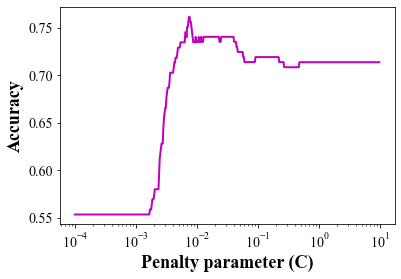

In [31]:
fig = plt.figure(1)
ax = plt.axes()

font = FontProperties()
font.set_name('Times New Roman')
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

ax.set_xlabel('Penalty parameter (C)', fontsize=18, fontdict=dict(weight='bold'))
plt.xscale("log")
ax.set_ylabel('Accuracy', fontsize=18, fontdict=dict(weight='bold'))

graph = ax.plot(C_range,df_mean, "m-", linewidth=2) # m: magenta color
# fig.colorbar(graph,ax=ax)
# print(C_range)
# print(df_mean)